<a href="https://colab.research.google.com/github/2303A51908/2303A51908-Application-of-datamining/blob/main/Titanic_No_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-ba249cc962d2>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Age'].fillna(X['Age'].median(), inplace=True)
<ipython-input-3-ba249cc962d2>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].median(), inplace=True)
<ipython-input-3-ba249cc962d2>:18: FutureWarning: A value is trying to be set on a co

Accuracy: 74.63%

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       157
           1       0.70      0.68      0.69       111

    accuracy                           0.75       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268


Decision Tree rules:
|--- Sex_male <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 2.50
|   |   |   |--- Fare <= 88.78
|   |   |   |   |--- class: 1
|   |   |   |--- Fare >  88.78
|   |   |   |   |--- class: 0
|   |   |--- Age >  2.50
|   |   |   |--- Fare <= 149.04
|   |   |   |   |--- Age <= 49.50
|   |   |   |   |   |--- Fare <= 22.00
|   |   |   |   |   |   |--- Fare <= 20.25
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Fare >  20.25
|   |   |   |   |   |   |   |--- SibSp <= 2.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- SibSp >  2.00
|   |   |   |   |  

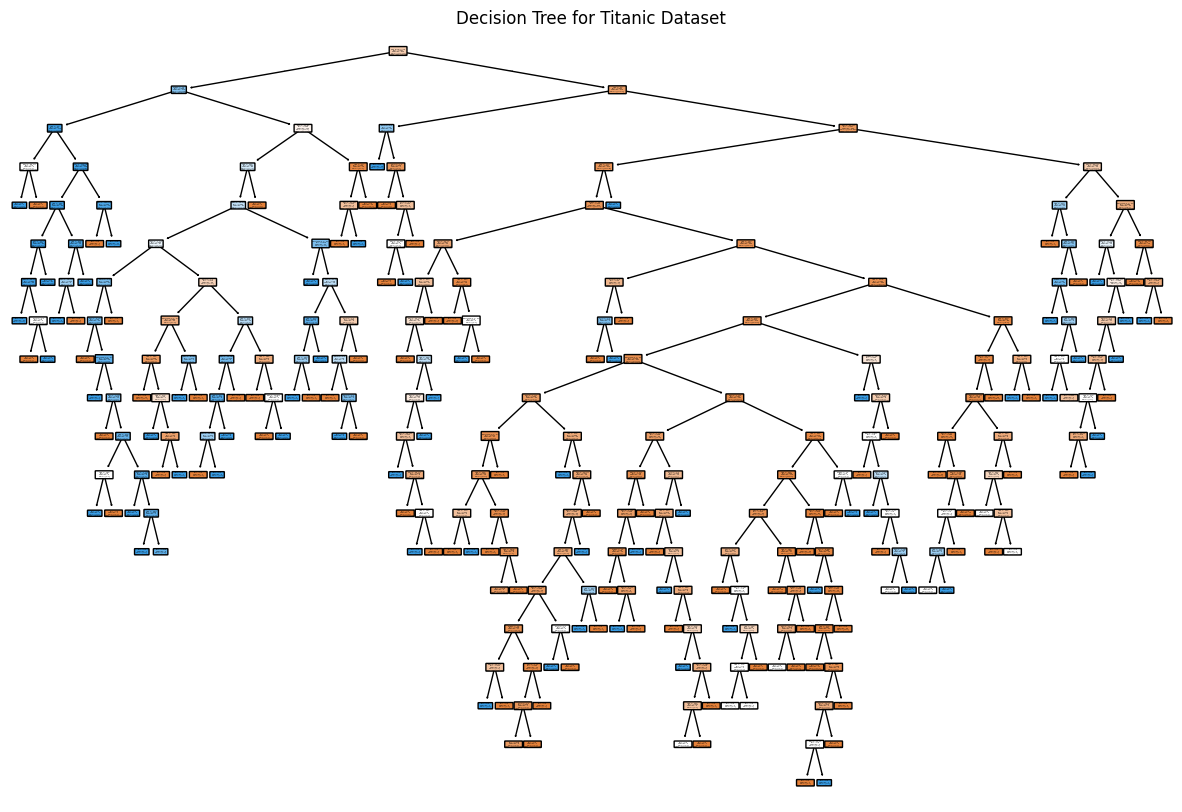

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = pd.read_csv('/content/titanic.csv')
df.head()

# Select relevant features and target variable
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

# Handle missing values
X['Age'].fillna(X['Age'].median(), inplace=True)
X['Embarked'].fillna(X['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Decision Tree classifier model
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification report for more detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display decision tree rules
print("\nDecision Tree rules:")
print(export_text(clf, feature_names=X.columns.tolist()))

# Plotting the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=['Not Survived', 'Survived'], rounded=True)
plt.title("Decision Tree for Titanic Dataset")
plt.show()